## Boosting vs Bagging

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*fdDu8RbNLoUzrrlF.jpeg" width="500">

Comparison: https://medium.com/@roshmitadey/bagging-v-s-boosting-be765c970fd1#a2dc

Both are **Ensemble Methods** — meaning they combine multiple "weak" models to create one "strong" model.

### Bagging (Bootstrap Aggregating)
It aims to reduce Variance (overfitting).

How it works: 
1. **Bootstrap**: Take your dataset and create multiple random subsets with replacement. Some rows will be repeated, and some will be left out. 
2. **Train**: Train a separate model (usually a Decision Tree) on each subset independently and in parallel. 
3. **Aggregate**: For classification, take a majority vote. For regression, take the average.

The Logic: 
- Since each tree sees a slightly different version of the data, they make different mistakes. When you average them, the individual errors (noise) cancel out.

Example: Random Forest Algorithm


### Boosting
It aims to reduce Bias (underfitting).

How it works:
1. **Train**: Train a simple model (Tree 1) on the whole dataset. It will likely perform poorly.
2. **Evaluate**: Identify the data points that Tree 1 got wrong (the residuals/errors).
3. **Weight/Correct**: Train Tree 2 specifically to predict those errors.
4. **Repeat**: Each subsequent tree tries to fix the "mistakes" of the previous ones.

The Logic: 
- Instead of just averaging opinions, Boosting "learns from its mistakes" over time.

Example: AdaBoost, Gradient Boosting, XGBoost, CatBoost.

### When to Use Which Technique
- Use Bagging when your model is overfitting and has high variance, especially with decision trees.
- Use Boosting when your model underfits and you want higher accuracy by learning complex patterns.
- Use Bagging if:
    - You have a small dataset or a lot of noise.
    - You want a "plug-and-play" model that doesn't need much hyperparameter tuning.
    - You are worried about the model memorizing the noise (overfitting).

- Use Boosting if:
    - You have plenty of data and need maximum accuracy.
    - The relationship between features is very complex.
    - You have the time to tune parameters like learning_rate and max_depth.

In [4]:
# Bagging (Random Forest)
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()

# X = Feature matrix (the measurements)
X = pd.DataFrame(data.data, columns=data.feature_names)

# y = Target vector (the flower species: 0, 1, or 2)
y = data.target

# Assuming X is your feature matrix and y is your labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the model
# n_estimators = number of trees in the forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train (Parallel process happening internally)
rf_model.fit(X_train, y_train)

# Predict
predictions = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")

Accuracy: 90.00%


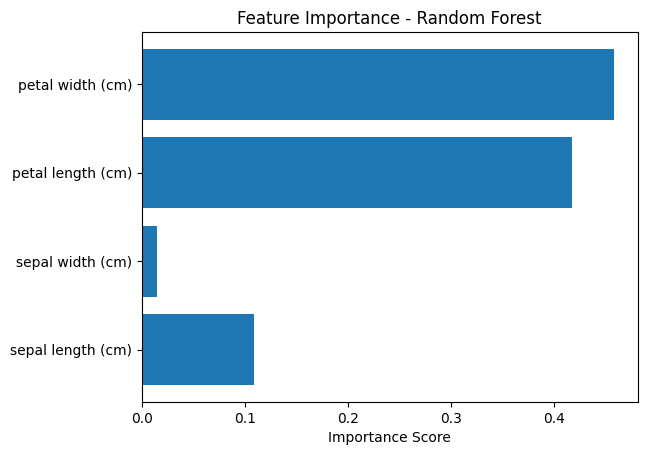

In [5]:
import matplotlib.pyplot as plt

# Get feature importance from the trained RF model
importances = rf_model.feature_importances_
feature_names = X.columns

# Visualize
plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.show()

In [6]:
# Boosting (XGBoost)

import xgboost as xgb

# Initialize the model
# learning_rate is key here: it shrinks the contribution of each tree 
# to prevent overfitting.
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1, 
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train (Sequential process: Tree 2 learns from Tree 1's errors)
xgb_model.fit(X_train, y_train)

# Predict
xgb_preds = xgb_model.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_preds)}")

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/mskorupinski/Library/Python/3.13/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <2B45A273-7403-3BBA-8DBD-A90F576E2F02> /Users/mskorupinski/Library/Python/3.13/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file)"]
